In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_parquet('../data/raw_data/df_comments_translated.parquet')

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

# Descargar recursos de NLTK si no están descargados
nltk.download('wordnet')
nltk.download('stopwords')

# Inicializar el lematizador en inglés
lemmatizer = WordNetLemmatizer()

# Cargar las stopwords en inglés
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if text is None:
        return None
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ivanseldasp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Preprocess text for sentiment analysis
df['clean_text'] = df['translation'].apply(preprocess_text)

In [5]:
# Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text, model):
    if type(text) != type('string'):
        return None
    sentiment = model.polarity_scores(text)
    return sentiment['compound']

analyzer = SentimentIntensityAnalyzer()

# Apply the sentiment analysis only to English comments and create a new 'sentiment' column
df['sentiment_trans'] = df.apply(lambda row: get_sentiment(row['translation'], analyzer), axis=1)

# df.to_parquet('../data/clean_data/df_trans_sent_comments.parquet', index=False)

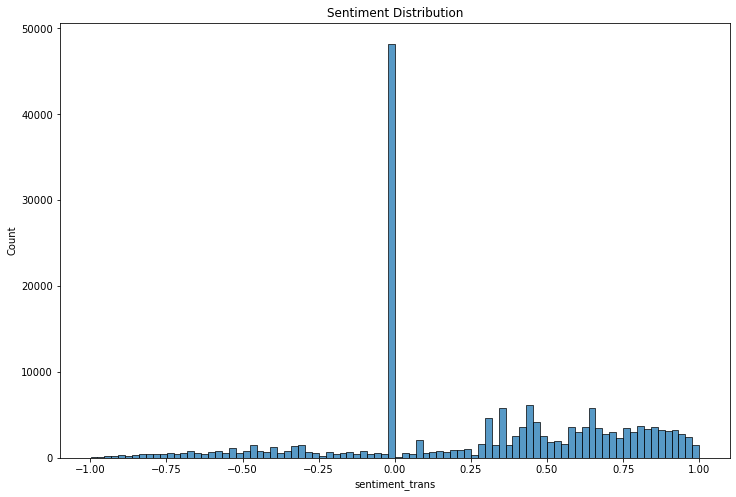

In [6]:
plt.figure(figsize=(12,8))
sns.histplot(df['sentiment_trans'])
plt.title('Sentiment Distribution')
plt.show();

In [7]:
def sentiment_description(sentiment):
    if sentiment is None:
        return None
    if sentiment < -0.1:
        return('negative')
    if sentiment > 0.1:
        return('positive')
    else:
        return('neutral')

df['sentiment_text_trans'] = df['sentiment_trans'].apply(sentiment_description)

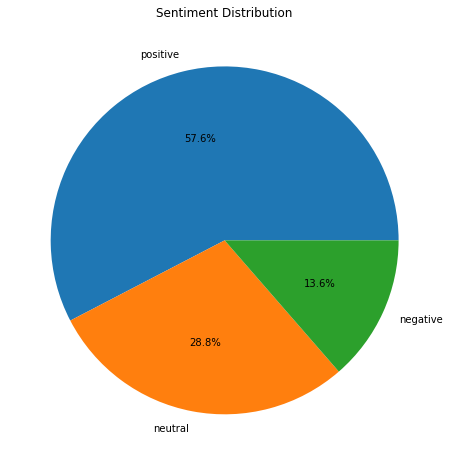

In [8]:
plt.figure(figsize=(12,8))
sentiment_counts = df['sentiment_text_trans'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')# Optional: Add a title
plt.title('Sentiment Distribution')
plt.show();

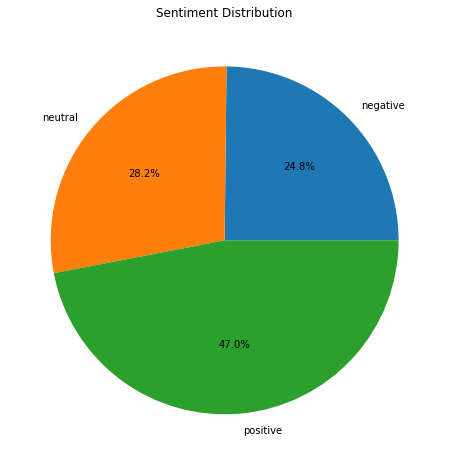

In [9]:
likes_per_sentiment = df.groupby('sentiment_text_trans')['like_count'].sum()

plt.figure(figsize=(12,8))
plt.pie(likes_per_sentiment, labels=likes_per_sentiment.index, autopct='%1.1f%%')# Optional: Add a title
plt.title('Sentiment Distribution')
plt.show();

# Transcriptions

In [13]:
df_transcripts = pd.read_csv('../data/raw_data/df_transcript_full.csv')
df_transcripts.head()

,video_id,original_language,transcription,language,0
0,qtlUwwtvuEg,English (auto-generated),[Music] thank you hello everyone I hope you ar...,english,NaN
1,QaoDXYYtgK0,English (auto-generated),number three [Music] Facebook has enacted an e...,english,NaN
2,PqDwddEHswU,English (auto-generated),in this series we're going to introduce deep l...,english,NaN
3,B-Y7rnOa43w,English (auto-generated),this is how to earn money with AI and it's par...,english,NaN
4,vyit-1zKsZ4,English (auto-generated),when current Medical Science has run out of op...,english,NaN


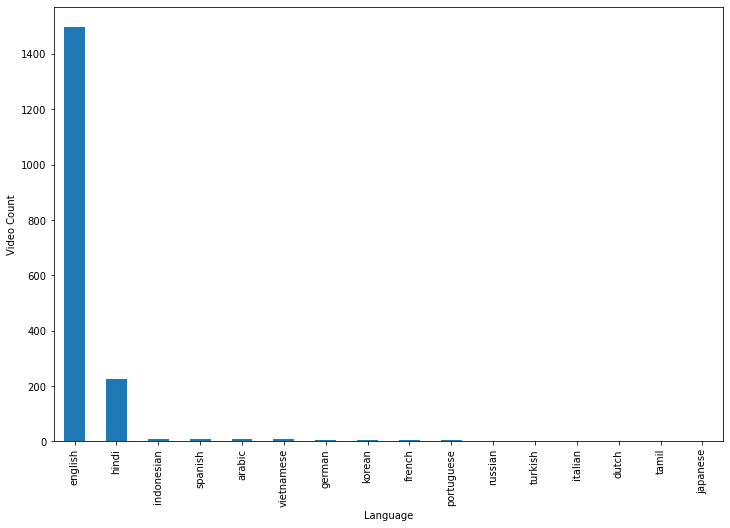

In [15]:
plt.figure(figsize=(12,8))
df_transcripts['language'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Video Count')
plt.savefig('../assets/transcript_languages.jpg', dpi=150)
plt.show()

In [28]:
df_transcripts['clean_text'] = df_transcripts['transcription'].iloc[:5].apply(preprocess_text)
df_transcripts[['transcription', 'clean_text']].head()

,transcription,clean_text
0,[Music] thank you hello everyone I hope you ar...,music thank hello everyone hope great era ai w...
1,number three [Music] Facebook has enacted an e...,number three music facebook enacted emergency ...
2,in this series we're going to introduce deep l...,series going introduce deep learning least per...
3,this is how to earn money with AI and it's par...,earn money ai part two let go want create kind...
4,when current Medical Science has run out of op...,current medical science run option doctor dont...


# Wordcloud

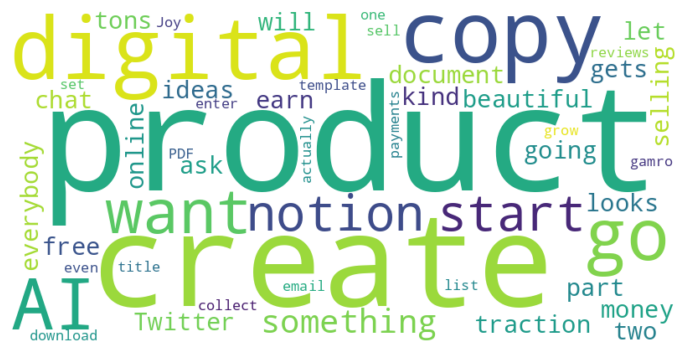

top 10 most frequent words
product: 1.0000
create: 0.7500
digital: 0.7500
copy: 0.7500
AI: 0.5000
go: 0.5000
want: 0.5000
notion: 0.5000
start: 0.5000
something: 0.5000


In [56]:
from wordcloud import WordCloud

text = df_transcripts['transcription'].iloc[3]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Print wordcloud graph
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extract top 10 most frequent words and frequency
word_frequencies = wordcloud.words_
top_10_words = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:10]

print(f'top 10 most frequent words')
for word, freq in top_10_words:
    print(f"{word}: {freq:.4f}")

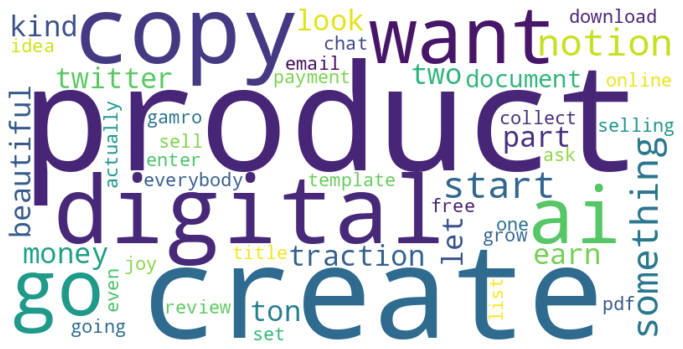

top 10 most frequent words
product: 1.0000
create: 0.7500
digital: 0.7500
copy: 0.7500
ai: 0.5000
go: 0.5000
want: 0.5000
notion: 0.5000
start: 0.5000
something: 0.5000


In [57]:
from wordcloud import WordCloud

text = df_transcripts['clean_text'].iloc[3]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Print wordcloud graph
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Extract top 10 most frequent words and frequency
word_frequencies = wordcloud.words_
top_10_words = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:10]

print(f'top 10 most frequent words')
for word, freq in top_10_words:
    print(f"{word}: {freq:.4f}")